In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
import pickle
import random

from sklearn.utils import shuffle
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing import image


In [4]:
with open("./traffic_sign_data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
    
with open("./traffic_sign_data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
    
with open("./traffic_sign_data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [11]:
print(train.keys())

dict_keys(['coords', 'labels', 'features', 'sizes'])


In [10]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [12]:
X_train.shape, X_validation.shape, X_test.shape

((34799, 32, 32, 3), (4410, 32, 32, 3), (12630, 32, 32, 3))

In [13]:
y_train.shape, y_validation.shape, y_test.shape

((34799,), (4410,), (12630,))

In [14]:
print(str(len(np.unique(y_train))) + ' classes in total')

43 classes in total


# Classes are as listed below: 
  - 0 = Speed limit (20km/h) 
  - 1 = Speed limit (30km/h)
  - 2 = Speed limit (50km/h) 
  - 3 = Speed limit (60km/h)
  - 4 = Speed limit (70km/h) 
  - 5 = Speed limit (80km/h)
  - 6 = End of speed limit (80km/h)
  - 7 = Speed limit (100km/h)
  - 8 = Speed limit (120km/h)
  - 9 = No passing
  - 10 = No passing for vehicles over 3.5 metric tons
  - 11 = Right-of-way at the next intersection
  - 12 = Priority road
  - 13 = Yield
  - 14 = Stop
  - 15 = No vehicles
  - 16 = Vehicles over 3.5 metric tons prohibited
  - 17 = No entry
  - 18 = General caution
  - 19 = Dangerous curve to the left
  - 20 = Dangerous curve to the right
  - 21 = Double curve
  - 22 = Bumpy road
  - 23 = Slippery road
  - 24 = Road narrows on the right
  - 25 = Road work
  - 26 = Traffic signals
  - 27 = Pedestrians
  - 28 = Children crossing 
  - 29 = Bicycles crossing
  - 30 = Beware of ice/snow
  - 31 = Wild animals crossing
  - 32 = End of all speed and passing limits
  - 33 = Turn right ahead
  - 34 = Turn left ahead
  - 35 = Ahead only
  - 36 = Go straight or right
  - 37 = Go straight or left
  - 38 = Keep right
  - 39 = Keep left
  - 40 = Roundabout mandatory
  - 41 = End of no passing
  - 42 = End of no passing by vehicles over 3.5 metric tons

In [16]:
Signs = {
  '0' : 'Speed limit (20km/h)',
  '1' : 'Speed limit (30km/h)',
  '2' : 'Speed limit (50km/h)' ,
  '3' : 'Speed limit (60km/h)',
  '4' : 'Speed limit (70km/h)' ,
  '5' : 'Speed limit (80km/h)',
  '6' : 'End of speed limit (80km/h)',
  '7' : 'Speed limit (100km/h)',
  '8' : 'Speed limit (120km/h)',
  '9' : 'No passing',
  '10' : 'No passing for vehicles over 3.5 metric tons',
  '11' : 'Right-of-way at the next intersection',
  '12' : 'Priority road',
  '13' : 'Yield',
  '14' : 'Stop',
  '15' : 'No vehicles',
  '16' : 'Vehicles over 3.5 metric tons prohibited',
  '17' : 'No entry',
  '18' : 'General caution',
  '19' : 'Dangerous curve to the left',
  '20' : 'Dangerous curve to the right',
  '21' : 'Double curve',
  '22' : 'Bumpy road',
  '23' : 'Slippery road',
  '24' : 'Road narrows on the right',
  '25' : 'Road work',
  '26' : 'Traffic signals',
  '27' : 'Pedestrians',
  '28' : 'Children crossing' ,
  '29' : 'Bicycles crossing',
  '30' : 'Beware of ice/snow',
  '31' : 'Wild animals crossing',
  '32' : 'End of all speed and passing limits',
  '33' : 'Turn right ahead',
  '34' : 'Turn left ahead',
  '35' : 'Ahead only',
  '36' : 'Go straight or right',
  '37' : 'Go straight or left',
  '38' : 'Keep right',
  '39' : 'Keep left',
  '40' : 'Roundabout mandatory',
  '41' : 'End of no passing',
  '42' : 'End of no passing by vehicles over 3.5 metric tons'
}

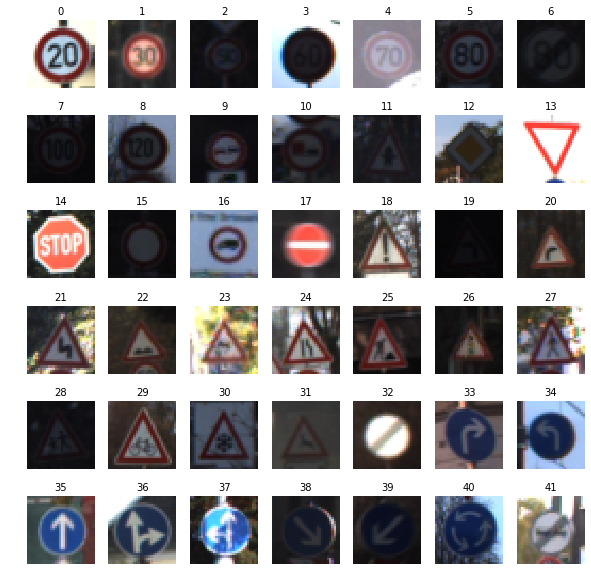

In [17]:
W_grid = 7
L_grid = 6

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel()

n_training = len(X_train)

for i in range(len(np.unique(y_train))-1):
    axes[i].imshow(X_train[y_train == i][np.random.randint(0, len(X_train[y_train == i]))])
    axes[i].set_title(i, fontsize = 10)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.4)



42

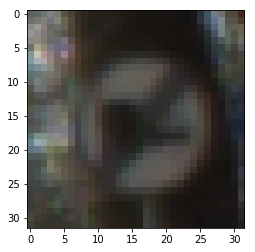

In [18]:
plt.imshow(X_train[y_train == 42][np.random.randint(0, len(X_train[y_train == 42]))])
y_train[y_train == 42][np.random.randint(0, len(X_train[y_train == 42]))]

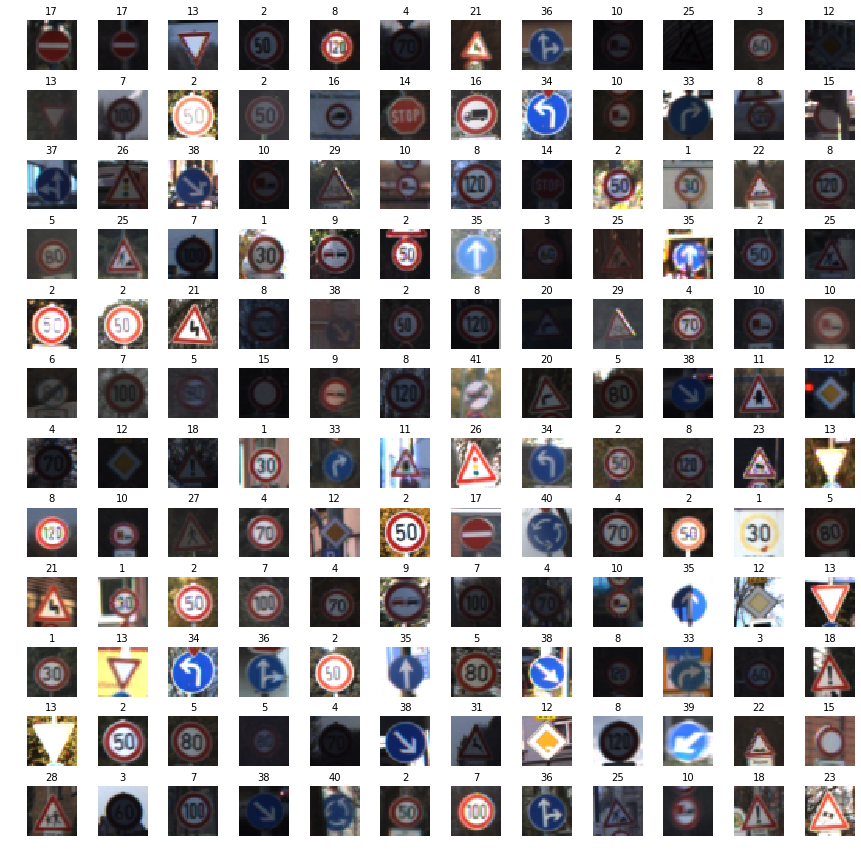

In [20]:
W_grid = 12
L_grid = 12

fig, axes = plt.subplots(L_grid, W_grid, figsize = (15,15))

axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index], fontsize = 10)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.4)


In [21]:
X_train.shape

(34799, 32, 32, 3)

In [22]:
X_train, y_train = shuffle(X_train, y_train)
X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)
X_train_gray_norm = (X_train_gray - 128) / 128

X_validation, y_validation = shuffle(X_validation, y_validation)
X_validation_gray = np.sum(X_validation/3, axis = 3, keepdims = True)
X_validation_gray_norm = (X_validation_gray - 128) / 128

X_test, y_test = shuffle(X_test, y_test)
X_test_gray = np.sum(X_test/3, axis=3, keepdims=True)
X_test_gray_norm = (X_test_gray - 128) / 128

In [23]:
X_train_gray_norm.shape, X_validation_gray_norm.shape, X_test_gray_norm.shape

((34799, 32, 32, 1), (4410, 32, 32, 1), (12630, 32, 32, 1))

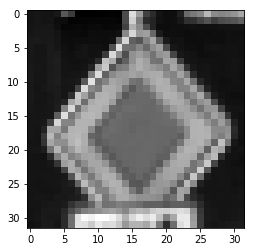

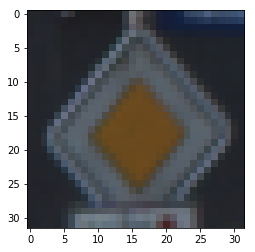

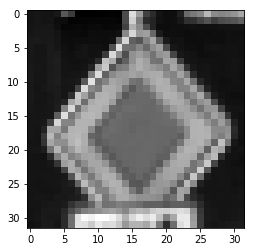

In [24]:
i = random.randint(1, len(X_train_gray))
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')